In [158]:
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import itertools


def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix\\\\")
    #else:
        #print('Confusion matrix, without normalization\\\\')
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

minmaxscaler = True
use_pca = False
lda = False
#Load data
df = pd.read_csv("exoplanet.csv")
df.info()
df = df.fillna(0)
df.sort_values('koi_disposition', inplace=True, ascending=False)
df = df.iloc[2500:]

df = df.sample(frac=1,random_state=42)

df = df.replace('CONFIRMED', 0) 
df = df.replace('CANDIDATE', 1) 
df = df.replace('FALSE POSITIVE', 2) 
df.to_csv("Exoplanet_mod.csv")

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
1716,1717,8026752,K00240.01,Kepler-502 b,0,2,0.007,0,1,0,...,-216.0,4.441,0.052,-0.208,1.049,0.332,-0.111,291.08014,43.860199,14.982
721,722,10785538,K01313.01,0,2,2,0.000,0,1,1,...,-180.0,4.459,0.084,-0.196,0.954,0.272,-0.117,286.66568,48.144581,13.343
1413,1414,9412760,K01977.02,Kepler-345 b,0,1,1.000,0,0,0,...,-90.0,4.656,0.012,-0.045,0.646,0.046,-0.020,295.22879,45.971020,14.028
1043,1044,5474733,K01610.01,0,2,2,0.000,0,0,1,...,-179.0,4.453,0.081,-0.189,0.949,0.277,-0.119,298.39490,40.628910,14.063
1079,1080,5184584,K01564.01,Kepler-891 b,0,1,0.989,0,0,0,...,-203.0,4.485,0.044,-0.187,1.000,0.257,-0.086,291.08380,40.355251,15.287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2042,9845898,K02423.01,Kepler-1233 b,0,1,1.000,0,0,0,...,-232.0,4.378,0.067,-0.202,1.169,0.382,-0.127,297.37509,46.662209,14.689
1061,1062,5219234,K01563.03,0,1,1,1.000,0,0,0,...,-101.0,4.562,0.032,-0.048,0.787,0.051,-0.039,299.22433,40.343182,15.812
8856,8857,10199984,K05776.01,0,1,1,0.000,0,0,0,...,-160.0,3.641,0.256,-0.336,2.522,1.444,-0.714,288.47318,47.247921,13.183
645,646,10337517,K01165.01,0,1,1,1.000,0,0,0,...,-107.0,4.498,0.058,-0.065,0.863,0.073,-0.065,291.06293,47.484798,13.916


In [159]:
#normalize feature with MinMaxScaler after it we need to fit the data
MinMaxScaler = preprocessing.MinMaxScaler()

y_data = pd.read_csv('Exoplanet_mod.csv', usecols= ['koi_disposition'])
x_data = pd.read_csv('Exoplanet_mod.csv', usecols= ['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec','koi_period','koi_period_err1','koi_period_err2','koi_time0bk','koi_time0bk_err1','koi_time0bk_err2','koi_impact','koi_impact_err1','koi_impact_err2','koi_duration','koi_duration_err1','koi_duration_err2','koi_depth','koi_depth_err1','koi_depth_err2','koi_prad','koi_prad_err1','koi_prad_err2','koi_teq','koi_teq_err1','koi_teq_err2','koi_insol','koi_insol_err1','koi_insol_err2','koi_model_snr','koi_tce_plnt_num','koi_steff','koi_steff_err1','koi_steff_err2','koi_slogg','koi_slogg_err1','koi_slogg_err2','koi_srad','koi_srad_err1','koi_srad_err2','ra','dec','koi_kepmag'])

#take the 80% of data for train and 20% for test
x_train = x_data[:5651]#7650
y_train = y_data[:5651]

x_test = x_data[5651:]
y_test = y_data[5651:]

x_train = x_train.values
x_test = x_test.values

print("Classes train : ", y_train.shape)
print("Features train : ", x_train.shape)

print("Classes test :", y_test.shape)
print("Features train : ", x_test.shape)

if minmaxscaler:
    x_train = MinMaxScaler.fit_transform(x_train)
    x_test = MinMaxScaler.fit_transform(x_test)


Classes train :  (5651, 1)
Features train :  (5651, 42)
Classes test : (1413, 1)
Features train :  (1413, 42)


In [160]:
from sklearn.decomposition import PCA
if use_pca : 
    # Calculate the mean of each feature and center the data
    m = np.mean(x_train, axis=0)
    Xc = x_train - m

    m1 = np.mean(x_test, axis=0)
    Xc_t = x_test - m1

    # Calculate the covariance matrix of the centred data
    C = np.cov(Xc, rowvar=False)
    C1 = np.cov(Xc_t, rowvar=False)

    # Calculate eigenvalues and eigenvectors of the covariance matrix
    lambdas, U = np.linalg.eigh(C)
    lambdas1, U1 = np.linalg.eigh(C1)

    # Order the eigenvalues from largest to smallest

    best_eig_idxs = np.argsort(lambdas)[::-1]
    best_eig = lambdas[best_eig_idxs]
    best_U = U[:, best_eig_idxs]

    best_eig_idxs1 = np.argsort(lambdas1)[::-1]
    best_eig1 = lambdas1[best_eig_idxs1]
    best_U1 = U1[:, best_eig_idxs1]

    # I construct the transformation matrix T: 
    T = best_U[:, :4]
    T1 = best_U1[:, :4]

    # Apply the transformation to the train data, make a scatter plot of the transformed data
    # The transformation is performed via the inner product of the transformation matrix T
    # and the (centered) data matrix
    x_train = np.dot(Xc, T)
    x_test = np.dot(Xc_t, T1)

In [161]:
#Calculate LDA with SKLEARN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
if lda :
    lda = LinearDiscriminantAnalysis(n_components=2)
    lda.fit(x_train, y_train)
    x_train = lda.transform(x_train)
    x_test = lda.transform(x_test)

d:\program file\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\program file\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


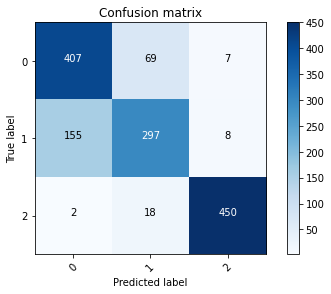

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       483
           1       0.77      0.65      0.70       460
           2       0.97      0.96      0.96       470

    accuracy                           0.82      1413
   macro avg       0.82      0.82      0.81      1413
weighted avg       0.82      0.82      0.82      1413



In [162]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

classes = ['0','1','2']

clf = MLPClassifier(hidden_layer_sizes=100, random_state=1, max_iter=5000, solver="lbfgs").fit(x_train, y_train)

predict=clf.predict(x_test)
confusion_matrix= metrics.confusion_matrix(y_test, predict)
clf.score(x_test, y_test)

plot_confusion_matrix(confusion_matrix, classes)
plt.show()

classification_metrics = metrics.classification_report(y_test, np.round(predict), target_names=classes)
cm_dict = metrics.classification_report(y_test, np.round(predict), target_names=classes, output_dict=True)
print(classification_metrics)

d:\program file\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


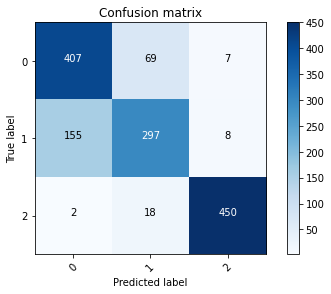

###################  lbfgs with hidden layers =  [100, 200, 500, 800]  ####################
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       483
           1       0.77      0.65      0.70       460
           2       0.97      0.96      0.96       470

    accuracy                           0.82      1413
   macro avg       0.82      0.82      0.81      1413
weighted avg       0.82      0.82      0.82      1413



d:\program file\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


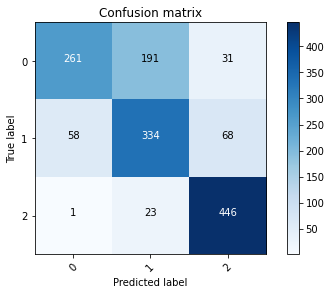

###################  lbfgs with hidden layers =  [100, 200, 500, 800]  ####################
              precision    recall  f1-score   support

           0       0.82      0.54      0.65       483
           1       0.61      0.73      0.66       460
           2       0.82      0.95      0.88       470

    accuracy                           0.74      1413
   macro avg       0.75      0.74      0.73      1413
weighted avg       0.75      0.74      0.73      1413



d:\program file\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


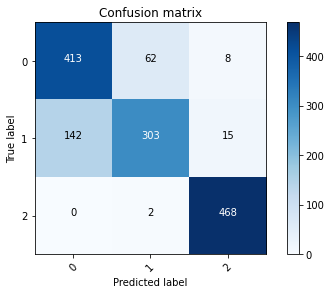

###################  lbfgs with hidden layers =  [100, 200, 500, 800]  ####################
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       483
           1       0.83      0.66      0.73       460
           2       0.95      1.00      0.97       470

    accuracy                           0.84      1413
   macro avg       0.84      0.84      0.83      1413
weighted avg       0.84      0.84      0.83      1413



d:\program file\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


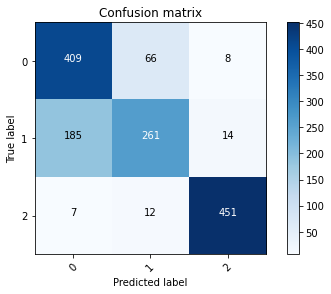

###################  lbfgs with hidden layers =  [100, 200, 500, 800]  ####################
              precision    recall  f1-score   support

           0       0.68      0.85      0.75       483
           1       0.77      0.57      0.65       460
           2       0.95      0.96      0.96       470

    accuracy                           0.79      1413
   macro avg       0.80      0.79      0.79      1413
weighted avg       0.80      0.79      0.79      1413



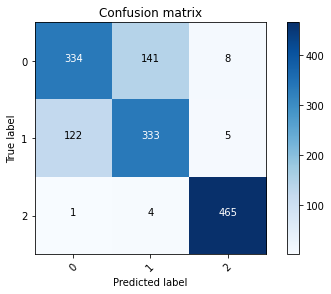

###################  sgd with hidden layers =  [100, 200, 500, 800]  ####################
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       483
           1       0.70      0.72      0.71       460
           2       0.97      0.99      0.98       470

    accuracy                           0.80      1413
   macro avg       0.80      0.80      0.80      1413
weighted avg       0.80      0.80      0.80      1413



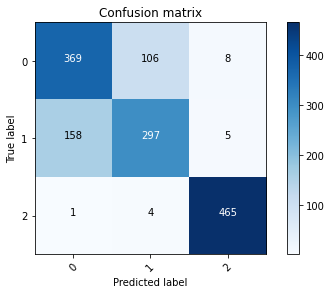

###################  sgd with hidden layers =  [100, 200, 500, 800]  ####################
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       483
           1       0.73      0.65      0.69       460
           2       0.97      0.99      0.98       470

    accuracy                           0.80      1413
   macro avg       0.80      0.80      0.80      1413
weighted avg       0.80      0.80      0.80      1413



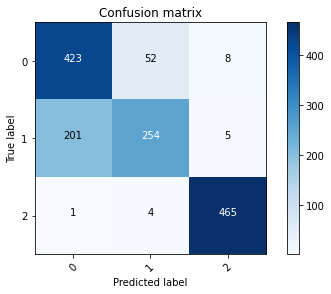

###################  sgd with hidden layers =  [100, 200, 500, 800]  ####################
              precision    recall  f1-score   support

           0       0.68      0.88      0.76       483
           1       0.82      0.55      0.66       460
           2       0.97      0.99      0.98       470

    accuracy                           0.81      1413
   macro avg       0.82      0.81      0.80      1413
weighted avg       0.82      0.81      0.80      1413



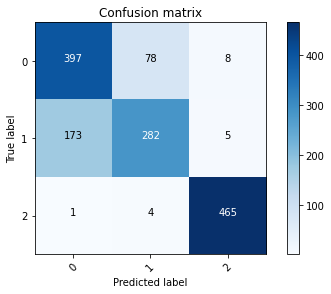

###################  sgd with hidden layers =  [100, 200, 500, 800]  ####################
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       483
           1       0.77      0.61      0.68       460
           2       0.97      0.99      0.98       470

    accuracy                           0.81      1413
   macro avg       0.81      0.81      0.81      1413
weighted avg       0.81      0.81      0.81      1413



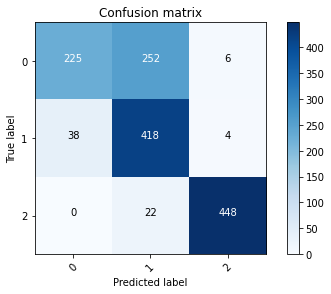

###################  adam with hidden layers =  [100, 200, 500, 800]  ####################
              precision    recall  f1-score   support

           0       0.86      0.47      0.60       483
           1       0.60      0.91      0.73       460
           2       0.98      0.95      0.97       470

    accuracy                           0.77      1413
   macro avg       0.81      0.78      0.76      1413
weighted avg       0.81      0.77      0.76      1413



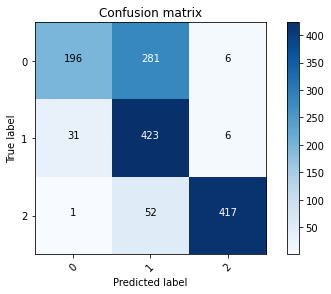

###################  adam with hidden layers =  [100, 200, 500, 800]  ####################
              precision    recall  f1-score   support

           0       0.86      0.41      0.55       483
           1       0.56      0.92      0.70       460
           2       0.97      0.89      0.93       470

    accuracy                           0.73      1413
   macro avg       0.80      0.74      0.72      1413
weighted avg       0.80      0.73      0.72      1413



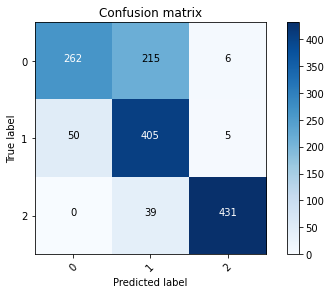

###################  adam with hidden layers =  [100, 200, 500, 800]  ####################
              precision    recall  f1-score   support

           0       0.84      0.54      0.66       483
           1       0.61      0.88      0.72       460
           2       0.98      0.92      0.95       470

    accuracy                           0.78      1413
   macro avg       0.81      0.78      0.78      1413
weighted avg       0.81      0.78      0.78      1413



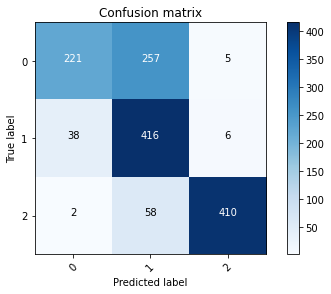

###################  adam with hidden layers =  [100, 200, 500, 800]  ####################
              precision    recall  f1-score   support

           0       0.85      0.46      0.59       483
           1       0.57      0.90      0.70       460
           2       0.97      0.87      0.92       470

    accuracy                           0.74      1413
   macro avg       0.80      0.74      0.74      1413
weighted avg       0.80      0.74      0.74      1413



In [163]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
classes = ['0','1','2']
solver = ["lbfgs", "sgd", "adam"]  
hls = [100,200,500,800]
temp = y_train.to_numpy()
result = temp.ravel()

for s in solver:
    for h in hls:
        if s == "lbfgs":
            clf = MLPClassifier(hidden_layer_sizes = h,random_state=1, max_iter=5000, solver = s).fit(x_train, result)
        else:
            clf = MLPClassifier(hidden_layer_sizes = h,random_state=1, max_iter=5000, solver = s).fit(x_train, result)
        predict=clf.predict(x_test)
        confusion_matrix= metrics.confusion_matrix(y_test, predict)
        clf.score(x_test, y_test)
        plot_confusion_matrix(confusion_matrix, classes)
        plt.show()
        classification_metrics = metrics.classification_report(y_test, np.round(predict), target_names=classes)
        cm_dict = metrics.classification_report(y_test, np.round(predict), target_names=classes, output_dict=True)
        print("################### ",s, "with hidden layers = ", hls, " ####################")
        print(classification_metrics)